
<div align="center">
<img src="data/RAUGM_horizontal.png" width="90%"/>
</div> 


<div align="center">
<h1> <srong> Curso CU05 </srong></h1>
    <h4> Instuctores: </h4>
    <h3> Pedro Damián Cruz Santiago </h3>
    <h3> Dulce Rosario Herrera Moro </h3>
    <br>
</div> 

# **Caso de uso 1: Kernel Python**


## Descripción de Librerías 

### Xarray 

Xarray es una librería que proporciona etiquetas a los datos numéricos en un array de numpy que se utilizan  para realizar acciones de una manera clara y concisa


<div align="center">
<img src="data/xarray.png" width="90%"/>
</div> 


### Numpy

Permite crear vectores y matrices multidimensionales grandes  y proporciona una gran colección de funciones matemáticas de alto nivel para operar con ellas.



### Matplotlib

maptplotlib es una librería de Python especializada en la creación de gráficas estáticas, animadas e interactivas en dos dimensiones.

## Primer ejemplo:

 En el primer ejemplo se utiliza la librería xarray para analizar un archivo en formato Netcdf con la información del canal 16 del satelite GOES descargado  del Laboratorio Nacional de Observación de la Tierra (LANOT)



### **Carga de librerías**

## Paso 2. Lectura de archivo de datos 

In [1]:

import numpy as np 
import xarray as xr

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt



### **Lectura de archivo de datos**

Se usa la función *open_dataset* para leer el archivo netcdf del canal 16 con una resolución de 2km  24 de agosto del 2017 16:00:36 hrs

In [2]:
nc_ds =  xr.open_dataset('data/netcdf_lanot/Mexico_2017.0824.154536.goes-16_C07_2km.nc')

los datos del archivo se carga en una estructura de Dataset de xarray

In [3]:
nc_ds

<xarray.Dataset>
Dimensions:      (y: 1280, x: 1920)
Dimensions without coordinates: y, x
Data variables:
    ABI-BT-ch07  (y, x) float32 ...
    latitude     (y, x) float32 ...
    longitude    (y, x) float32 ...
Attributes: (12/107)
    earth_location_notes:          Missing value for all earth location numer...
    projection_name:               LambertConformalConic
    proj_origin_latitude:          23.5
    proj_origin_longitude:         -102.0
    std_parallel_1:                18.5
    std_parallel_2:                28.5
    ...                            ...
    y\coord:                       y
    y\scale:                       2.0
    y\offset:                      0.5
    x\coord:                       x
    x\scale:                       2.0
    x\offset:                      0.5

<div class="alert alert-info">
    
   <strong>NOTA:</strong > <br>Nótese que al cargar el archivo en la estructura de datos, no se definen los datos de coordenadas.
</div>
 

### Paso 3. Manipulación de datos

La función **set_coords** establece las variables especificadadas como coordenadas. En nuestro caso, los datos de las coordenadas están en las variables *latitude* y *longitude*.

In [4]:
nc_ds.set_coords(['longitude','latitude'])

<xarray.Dataset>
Dimensions:      (y: 1280, x: 1920)
Coordinates:
    latitude     (y, x) float32 ...
    longitude    (y, x) float32 ...
Dimensions without coordinates: y, x
Data variables:
    ABI-BT-ch07  (y, x) float32 ...
Attributes: (12/107)
    earth_location_notes:          Missing value for all earth location numer...
    projection_name:               LambertConformalConic
    proj_origin_latitude:          23.5
    proj_origin_longitude:         -102.0
    std_parallel_1:                18.5
    std_parallel_2:                28.5
    ...                            ...
    y\coord:                       y
    y\scale:                       2.0
    y\offset:                      0.5
    x\coord:                       x
    x\scale:                       2.0
    x\offset:                      0.5

La propiedad **data_vars** devuelve todos etiquetadas como *variables* y *coordenadas*  en el conjunto de datos.

In [5]:
vars=nc_ds.data_vars
print(vars)

Data variables:
    ABI-BT-ch07  (y, x) float32 ...
    latitude     (y, x) float32 ...
    longitude    (y, x) float32 ...


*data_vars* es iterable por lo que podemos obtener una lista con los nombres de las variables de la siguiente forma:  

In [6]:
var_names=[i for i in nc_ds.data_vars]

print(var_names)


['ABI-BT-ch07', 'latitude', 'longitude']


Podemos acceder a una variable especifica indicado su nombre entre corchetes. Los atributos de la variable nos indican que los valores estan en grados kelvin.

In [8]:
variable=nc_ds['ABI-BT-ch07']
print(variable)

<xarray.DataArray 'ABI-BT-ch07' (y: 1280, x: 1920)>
[2457600 values with dtype=float32]
Dimensions without coordinates: y, x
Attributes:
    units:      temp_deg_k
    valid_min:  -3.4028235e+38
    valid_max:  3.4028235e+38


Al imprimir los datos de la variable se observa que los datos estan expresados en grados Kelvin, para hacer la conversión a grados Celsius se resta el valor constante 273.15

In [9]:
variable=variable-273.15
print(variable)

<xarray.DataArray 'ABI-BT-ch07' (y: 1280, x: 1920)>
array([[28.11969   , 28.29184   , 28.704407  , ..., 40.62976   ,
        41.04431   , 41.319763  ],
       [28.182434  , 28.743927  , 29.35849   , ..., 40.733948  ,
        41.45572   , 41.775757  ],
       [28.06894   , 28.57196   , 29.497528  , ..., 40.947174  ,
        41.57602   , 41.818573  ],
       ...,
       [21.297302  , 20.537994  , 20.356628  , ...,  3.0401611 ,
         2.3182678 ,  1.7831421 ],
       [25.183838  , 23.845337  , 22.677277  , ...,  2.6658936 ,
         1.1742249 ,  0.3451538 ],
       [27.760223  , 27.062897  , 26.584045  , ...,  1.9570618 ,
         0.79330444,  0.06265259]], dtype=float32)
Dimensions without coordinates: y, x


<div class="alert alert-info">
    
   <strong>NOTA:</strong > <br> DataArray sobre carga el operador **-** para aplicar la operación sobre cada uno de sus elementos porlo que no es necesario realizar ciclos anidados.
</div>

Xarray contiene Para obtener los valores máximo y mínimo de la variable de interes 

In [10]:
val_max=variable.max()
val_min=variable.min()
val_mean=variable.mean()
print(val_max)
print(val_max)
val_mean=variable.mean()


<xarray.DataArray 'ABI-BT-ch07' ()>
array(61.953583, dtype=float32)
<xarray.DataArray 'ABI-BT-ch07' ()>
array(61.953583, dtype=float32)


<div class="alert alert-warning">
    
   <strong>OJO</strong > <br> Se tienen que conocer el tipo de dato que regresan las funciones que se utilizan. En el caso anterior, el tipo que regresan las funciones no es un nuero decimal como se espera. 
</div>

In [11]:
type(val_max)

xarray.core.dataarray.DataArray

In [12]:
val_max=variable.max().values
val_min=variable.min().values 
print("valor máximo: ",val_max , "  valor mínimo: ",val_min)


valor máximo:  61.953583   valor mínimo:  -30.25467


## Visualización


### Controles iteractivos

Los widgets de Jupyter  permiten convertir Jupyter Notebooks de documentos estáticos en tableros interactivos, perfectos para explorar y visualizar datos. Los controles en widgets incluyen dos partes:

- **UI/HTML element** Esta es la parte que se muestra en la celda de salida, generalmente se pasa como un argumento de la función de visualización después de la creación de instancias
- **event handler** El evento de registro del control, la práctica habitual es pasar una función python definida como argumento al evento del control

In [13]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

Con el decorador **@interact** examina  de la función  y crea automáticamente un control con base en los tipos las entradas. En este caso se crea un control deslizante que permite elegir un número entre los valores mímnimo y máximo del conjunto de datos de la variable . El valor seleccionado se puede acceder dentro de la función ateaves de la variable x. Para este caso, el valor se usa como umbral inferior para filtrar los valores de la variable *ABI-BT-ch16*.




In [15]:
@interact
def show_articles_more_than(x=(np.round(val_min)-2,np.round(val_max))):
    
    dfint= variable.where(variable.values > x)
    
    fig = plt.figure(figsize=(6,6),dpi=200)
    dfint.plot(cmap="coolwarm",vmin=-30, vmax=45)
    

    

interactive(children=(FloatSlider(value=15.0, description='x', max=62.0, min=-32.0), Output()), _dom_classes=(…

## glob

Se utiliza para devolver todas las rutas de archivo que coinciden con un patrón específico.

In [16]:
import glob


El método glob() devuelve una lista de archivos o carpetas que coinciden con la ruta especificada en el argumento de nombre de ruta.

In [17]:
netcdf_list = glob.glob('data/netcdf_lanot/Mexico_2017.0824.154536*.nc')
netcdf_list

['data/netcdf_lanot/Mexico_2017.0824.154536.goes-16_C03_2km.nc',
 'data/netcdf_lanot/Mexico_2017.0824.154536.goes-16_C01_2km.nc',
 'data/netcdf_lanot/Mexico_2017.0824.154536.goes-16_C04_2km.nc',
 'data/netcdf_lanot/Mexico_2017.0824.154536.goes-16_C02_2km.nc',
 'data/netcdf_lanot/Mexico_2017.0824.154536.goes-16_C07_2km.nc',
 'data/netcdf_lanot/Mexico_2017.0824.154536.goes-16_C05_2km.nc',
 'data/netcdf_lanot/Mexico_2017.0824.154536.goes-16_C06_2km.nc']

La función Abra varios archivos como un solo conjunto de datos

In [18]:
netcdfs_ds = xr.open_mfdataset(paths=netcdf_list, combine='by_coords')
netcdfs_ds

<xarray.Dataset>
Dimensions:       (y: 1280, x: 1920)
Dimensions without coordinates: y, x
Data variables:
    ABI-BT-ch07   (y, x) float32 dask.array<chunksize=(1280, 1920), meta=np.ndarray>
    latitude      (y, x) float32 dask.array<chunksize=(1280, 1920), meta=np.ndarray>
    longitude     (y, x) float32 dask.array<chunksize=(1280, 1920), meta=np.ndarray>
    ABI-Ref-ch01  (y, x) float32 dask.array<chunksize=(1280, 1920), meta=np.ndarray>
    ABI-Ref-ch02  (y, x) float32 dask.array<chunksize=(1280, 1920), meta=np.ndarray>
    ABI-Ref-ch03  (y, x) float32 dask.array<chunksize=(1280, 1920), meta=np.ndarray>
    ABI-Ref-ch04  (y, x) float32 dask.array<chunksize=(1280, 1920), meta=np.ndarray>
    ABI-Ref-ch05  (y, x) float32 dask.array<chunksize=(1280, 1920), meta=np.ndarray>
    ABI-Ref-ch06  (y, x) float32 dask.array<chunksize=(1280, 1920), meta=np.ndarray>
Attributes: (12/107)
    earth_location_notes:          Missing value for all earth location numer...
    projection_name:               LambertConformalConic
    proj_origin_latitude:          23.5
    proj_origin_longitude:         -102.0
    std_parallel_1:                18.5
    std_parallel_2:                28.5
    ...                            ...
    y\coord:                       y
    y\scale:                       2.0
    y\offset:                      0.5
    x\coord:                       x
    x\scale:                       2.0
    x\offset:                      0.5

<div class="alert alert-info">
    
   <strong>NOTA:</strong > <br> open_mfdataset abre archivos con acceso de solo lectura. Cuando modifica los valores de un conjunto de datos, incluso uno vinculado a archivos en el disco, solo se modifica la copia en memoria que está manipulando en xarray: el archivo original en el disco nunca se toca.
    
  </div>

In [19]:
netcdfs_ds.set_coords(['longitude','latitude'])

<xarray.Dataset>
Dimensions:       (y: 1280, x: 1920)
Coordinates:
    latitude      (y, x) float32 dask.array<chunksize=(1280, 1920), meta=np.ndarray>
    longitude     (y, x) float32 dask.array<chunksize=(1280, 1920), meta=np.ndarray>
Dimensions without coordinates: y, x
Data variables:
    ABI-BT-ch07   (y, x) float32 dask.array<chunksize=(1280, 1920), meta=np.ndarray>
    ABI-Ref-ch01  (y, x) float32 dask.array<chunksize=(1280, 1920), meta=np.ndarray>
    ABI-Ref-ch02  (y, x) float32 dask.array<chunksize=(1280, 1920), meta=np.ndarray>
    ABI-Ref-ch03  (y, x) float32 dask.array<chunksize=(1280, 1920), meta=np.ndarray>
    ABI-Ref-ch04  (y, x) float32 dask.array<chunksize=(1280, 1920), meta=np.ndarray>
    ABI-Ref-ch05  (y, x) float32 dask.array<chunksize=(1280, 1920), meta=np.ndarray>
    ABI-Ref-ch06  (y, x) float32 dask.array<chunksize=(1280, 1920), meta=np.ndarray>
Attributes: (12/107)
    earth_location_notes:          Missing value for all earth location numer...
    projection_name:               LambertConformalConic
    proj_origin_latitude:          23.5
    proj_origin_longitude:         -102.0
    std_parallel_1:                18.5
    std_parallel_2:                28.5
    ...                            ...
    y\coord:                       y
    y\scale:                       2.0
    y\offset:                      0.5
    x\coord:                       x
    x\scale:                       2.0
    x\offset:                      0.5

In [20]:
op1=netcdfs_ds['ABI-Ref-ch01']


In [21]:
op2=netcdfs_ds['ABI-BT-ch07']

In [22]:
res=op1-op2


Text(0.5, 0.98, 'Diferencias entre dos variables')

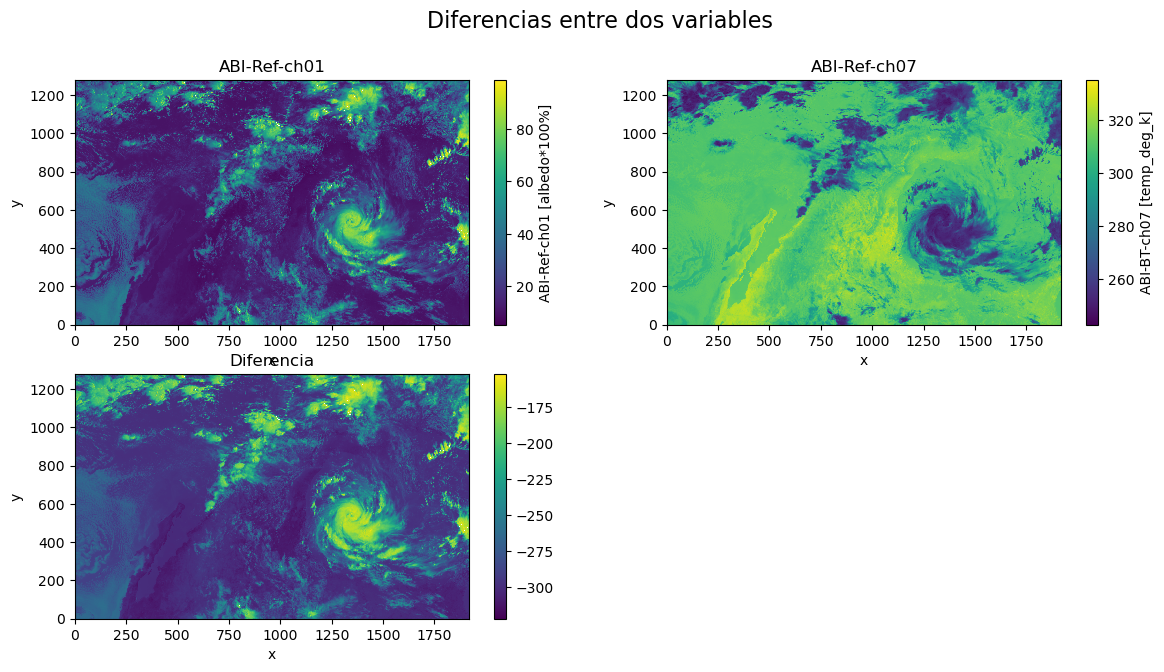

In [23]:
f, axs = plt.subplots(2,2, figsize=(14, 7))

op1.plot( ax=axs[0,0])
axs[0,0].set_title('ABI-Ref-ch01')
op2.plot(ax=axs[0,1])
axs[0,1].set_title('ABI-Ref-ch07')
res.plot(ax=axs[1,0])
axs[1,0].set_title('Diferencia')

f.delaxes(axs[1,1])
f.suptitle('Diferencias entre dos variables', fontsize=16)


Para guadar la imagen generada se usa el método *savefig*

## Ejemplo dos: Salidas modelo WRF¶

En este ejemplo se analiza una salida del modelo  en donde cada variable es un cubo formado por las dimensiones longitud, latitud y tiempo

### Carga de datos

In [24]:
ds_wrf =  xr.open_dataset('data/wrf_out.nc')

In [25]:
ds_wrf

<xarray.Dataset>
Dimensions:      (time: 720, south_north: 159, west_east: 159)
Coordinates:
  * time         (time) datetime64[ns] 2014-08-01 ... 2014-08-30T23:00:00
    XLAT         (south_north, west_east) float32 ...
    XLONG        (south_north, west_east) float32 ...
    lat          (south_north, west_east) float32 ...
    lon          (south_north, west_east) float32 ...
Dimensions without coordinates: south_north, west_east
Data variables:
    PREC_ACC_NC  (time, south_north, west_east) float32 ...
    T2           (time, south_north, west_east) float32 ...
    U10          (time, south_north, west_east) float32 ...
    V10          (time, south_north, west_east) float32 ...
Attributes: (12/137)
    TITLE:                            OUTPUT FROM WRF V3.9 MODEL
    START_DATE:                      2014-08-01_00:00:00
    SIMULATION_START_DATE:           2014-08-01_00:00:00
    WEST-EAST_GRID_DIMENSION:        160
    SOUTH-NORTH_GRID_DIMENSION:      160
    BOTTOM-TOP_GRID_DIMENSION:       51
    ...                              ...
    HYBRID_OPT:                      -1
    ETAC:                            0.0
    history:                         Tue Feb  5 11:36:06 2019: ncrcat all_T2_...
    NCO:                             netCDF Operators version 4.7.4 (http://n...
    nco_openmp_thread_number:        1
    history_of_appended_files:       Tue Feb  5 11:36:06 2019: Appended file ...

### Computo

Xarray proporciona un conjunto de funciones que nos permite agrupar y operar sobre un subconjunto de datos. En este caso la finción *resamble* permite remuestrar los datos.  

In [26]:
ds_wrf_resam=ds_wrf.T2.resample(time="3H").mean()
ds_wrf_resam

<xarray.DataArray 'T2' (time: 240, south_north: 159, west_east: 159)>
array([[[287.53018, 287.55823, 287.53772, ..., 281.73798, 281.77213,
         281.70798],
        [287.57803, 287.5472 , 287.54544, ..., 281.55746, 281.73608,
         281.67166],
        [287.5414 , 287.51068, 287.51205, ..., 281.66284, 281.6382 ,
         281.54825],
        ...,
        [283.87897, 283.78973, 283.696  , ..., 278.8478 , 278.74332,
         278.65744],
        [284.03952, 283.94608, 284.0868 , ..., 278.69183, 278.56894,
         278.4788 ],
        [284.14545, 284.04   , 283.91125, ..., 278.54468, 278.55032,
         278.47202]],

       [[288.42017, 288.50464, 288.50833, ..., 281.40536, 281.38412,
         281.23038],
        [288.48593, 288.4825 , 288.51688, ..., 281.26782, 281.19733,
         280.95728],
        [288.43198, 288.43423, 288.4717 , ..., 281.06424, 280.96622,
         280.70297],
...
        [285.29413, 285.26718, 285.15747, ..., 277.14563, 276.8567 ,
         276.5712 ],
        [285.94522, 285.8936 , 285.71262, ..., 276.8732 , 276.60403,
         276.37997],
        [286.34158, 285.97815, 285.50772, ..., 276.73474, 276.57993,
         276.37686]],

       [[287.81595, 287.90683, 287.92963, ..., 281.88815, 281.8889 ,
         281.7447 ],
        [287.92007, 287.93103, 287.967  , ..., 281.59683, 281.5424 ,
         281.4178 ],
        [287.91974, 287.9231 , 287.9506 , ..., 281.36252, 281.25024,
         281.0687 ],
        ...,
        [285.09726, 284.94006, 284.7988 , ..., 277.0479 , 276.75906,
         276.51688],
        [285.77774, 285.5345 , 285.63602, ..., 276.7905 , 276.51965,
         276.3201 ],
        [286.1672 , 285.799  , 285.296  , ..., 276.6097 , 276.51746,
         276.32153]]], dtype=float32)
Coordinates:
    XLAT     (south_north, west_east) float32 59.7 59.7 59.7 ... 61.02 61.02
    XLONG    (south_north, west_east) float32 5.689 5.706 5.723 ... 8.433 8.451
    lat      (south_north, west_east) float32 59.7 59.7 59.7 ... 61.02 61.02
    lon      (south_north, west_east) float32 5.689 5.706 5.723 ... 8.433 8.451
  * time     (time) datetime64[ns] 2014-08-01 ... 2014-08-30T21:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  TEMP at 2 M
    units:        K
    stagger:      
    coordinates:  XLONG XLAT XTIME

### Visualización

Gráfica de los datos remuestrados 

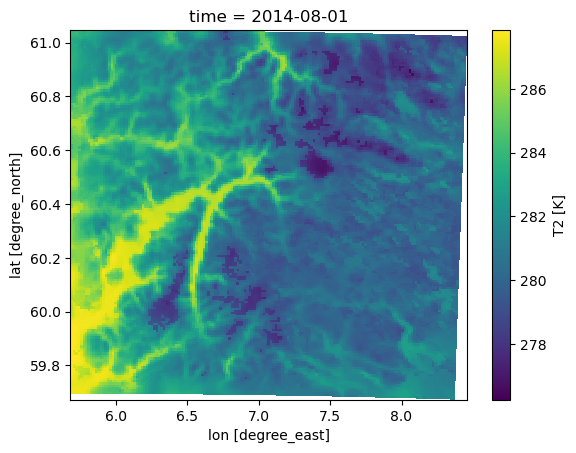

In [27]:
ds_wrf_resam[0].plot(x='lon', y='lat')

Se obtiene la serie de tiempo de un punto geográfico específico 

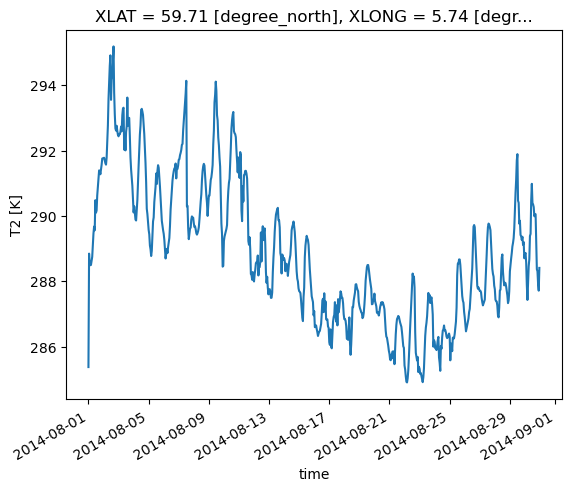

In [28]:
ds_wrf.T2[:,1,3].plot()

<div class="alert alert-info">
    
   <strong>NOTA:</strong > <br> Observe que en el ejemplo anterior se muestra que además de las etiquetas, tambien se pueden seleccionar los datos usando índices númericos. 
    
  </div>

## Referencias

- https://www.lanot.unam.mx/
- https://numpy.org/doc/
- https://docs.xarray.dev/en/stable/
- https://scitools.org.uk/cartopy/docs/latest/
- http://gallery.pangeo.io/index.htmlhttp://gallery.pangeo.io/index.html